In [48]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import numpy as np

### DataSet

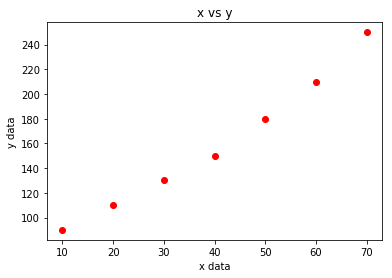

In [49]:
# x=[10, 20, 30, 40, 50, 60, 70, 80]
# y=[5, 15, 40, 66, 70, 85, 125, 500]
x=[10, 20, 30, 40, 50, 60, 70]
y=[90, 110, 130, 150, 180, 210, 250]


plt.scatter(x, y, color = 'red') 
plt.title('x vs y')
plt.xlabel('x data')
plt.ylabel('y data')
plt.show()

### Using Scikit-Learn Linear Regression Model

In [50]:
xx=[]
for ix in x:
    xx.append([ix])


model = LinearRegression()
model.fit(xx, y)

pred=model.predict(xx)
print pred

[  81.78571429  107.85714286  133.92857143  160.          186.07142857
  212.14285714  238.21428571]


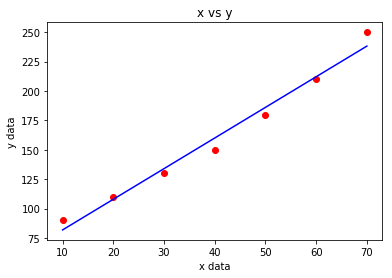

In [51]:
plt.scatter(x, y, color = 'red')
plt.plot(x, pred, color = 'blue')
plt.title('x vs y')
plt.xlabel('x data')
plt.ylabel('y data')
plt.show()

y = mx + c

In [52]:
xt=[[80]]
yp= model.predict(xt)
yp

array([ 264.28571429])

### Least Square Method

<img src="m_c_eq.png">

In [53]:
# Building the model
X_mean = np.mean(x)
Y_mean = np.mean(y)

In [54]:
Y_mean

160.0

In [55]:
num = 0
den = 0
for i in range(len(x)):
    num += (x[i] - X_mean)*(y[i] - Y_mean)
    den += (x[i] - X_mean)**2
m = num / den
c = Y_mean - m*X_mean

print (m, c)

(2.6071428571428572, 55.714285714285708)


In [56]:
xt=80
yp = m*xt + c
print yp

264.285714286


[81.785714285714278, 107.85714285714286, 133.92857142857144, 160.0, 186.07142857142856, 212.14285714285717, 238.21428571428572]


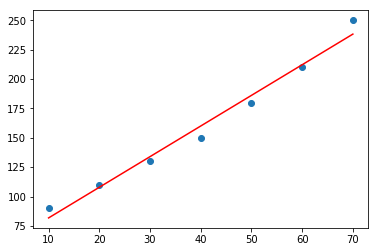

In [57]:
# Making predictions
yp=[m*ix+c for ix in x]
print yp

plt.scatter(x, y) # actual 
plt.plot(x, yp, color='red') 
plt.show()

### Gradient Descent Method

<img src='grad.png' width=400 height=320>

<img src="meq.jpeg">

In [38]:
def do_eq(xx, m, c):
    xxd=[m*ix+c for ix in xx]
    return xxd

In [39]:
 
xxd=[2*ix for ix in x]
print xxd

xxd=do_eq(x, 2, 1)
print xxd

[20, 40, 60, 80, 100, 120, 140]
[21, 41, 61, 81, 101, 121, 141]


In [40]:
def dwrt_m(X, Y, Y_pred): 
    ssd=[ (iy-iyp) for iy,iyp in zip(Y,Y_pred)]
    ssd2=[ ix*issd for ix, issd in zip (X,ssd)]
    s= (-2/len(X)) * sum(ssd2)
    return s

In [41]:
Y_pred=do_eq(x, m, c)
rt=dwrt_m(x, y, yp)
print 'rt=',rt

rt= 1.70530256582e-12


In [42]:
def dwrt_c(X, Y, Y_pred): 
    ssd=[ (iy-iyp) for iy,iyp in zip(Y,Y_pred)]
    s= (-2/len(X)) * sum(ssd)
    return s

In [43]:
Y_pred=do_eq(x, m, c)
rtc=dwrt_c(x, y, yp)
print 'rtc=',rtc

rtc= 2.84217094304e-14


In [44]:
def ce(Y, Y_predict):
    er=[(yy-yyp)**2 for yy,yyp in zip(Y, Y_pred)]
    avg=sum(er)/len(er)
    return avg


In [69]:
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 50000  # The number of iterations to perform gradient descent

n = float(len(x))

In [70]:
# Performing Gradient Descent 
err=[]
for i in range(epochs): 
    Yp=do_eq(x, m, c)
    ae=ce(y, Yp)
    err.append(ae)
    D_m=dwrt_m(x,y,Yp)
    D_c= dwrt_c(x,y,Yp)
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

(2.608160045090174, 55.663431400825836)


In [71]:
xt=80
yp = m*xt + c
print yp

264.316235008


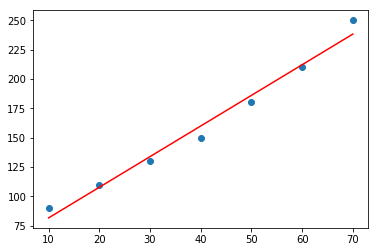

In [72]:
Yp=[m*xx+c for xx in x]

plt.scatter(x, y) 
plt.plot(x, Yp, color='red')  # regression line
plt.show()

In [73]:
print 'total=', len(err)
xe=[i for i in range(len(err))]

total= 50000


In [74]:
print xe[-100:]
# print err[:100]
print xe[:10]

[49900, 49901, 49902, 49903, 49904, 49905, 49906, 49907, 49908, 49909, 49910, 49911, 49912, 49913, 49914, 49915, 49916, 49917, 49918, 49919, 49920, 49921, 49922, 49923, 49924, 49925, 49926, 49927, 49928, 49929, 49930, 49931, 49932, 49933, 49934, 49935, 49936, 49937, 49938, 49939, 49940, 49941, 49942, 49943, 49944, 49945, 49946, 49947, 49948, 49949, 49950, 49951, 49952, 49953, 49954, 49955, 49956, 49957, 49958, 49959, 49960, 49961, 49962, 49963, 49964, 49965, 49966, 49967, 49968, 49969, 49970, 49971, 49972, 49973, 49974, 49975, 49976, 49977, 49978, 49979, 49980, 49981, 49982, 49983, 49984, 49985, 49986, 49987, 49988, 49989, 49990, 49991, 49992, 49993, 49994, 49995, 49996, 49997, 49998, 49999]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


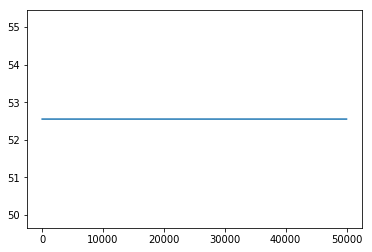

In [75]:
#TO CHECK.

# plt.plot(xe[:1000], err[:1000]) 
# plt.plot(xe[:20], err[:20]) 
plt.plot(xe, err)
plt.show()

### Matrix Way (not completed)

In [116]:
import numpy as np
data = np.loadtxt('data1.txt', delimiter=',')
X_train = data[:,0] #the feature_set
y_train = data[:,1] #the labels

In [117]:
n=4
X_train=X_train[:n]
y_train=y_train[:n]

In [42]:
X_train.shape

(4L,)

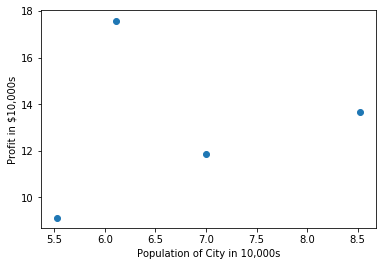

In [43]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [44]:
def hypothesis(theta, X):
    n=X.shape[0]
    h = np.ones((n,1))
    for i in range(0,n):
        x = np.concatenate((np.ones(1), np.array([X[i]])), axis = 0)
        h[i] = float(np.matmul(theta, x))
    h = h.reshape(n)
    return h

In [45]:
theta = np.zeros(2)
h = hypothesis(theta, X_train)  
h

array([ 0.,  0.,  0.,  0.])

In [46]:
print X_train.shape[0]

4


In [47]:
h = np.ones(n)
print h

[ 1.  1.  1.  1.]


theta= [[ 55.71428571]
 [  2.60714286]]  X= [[ 1]
 [80]]


In [114]:
print theta.transpose(), nnx

[[ 55.71428571   2.60714286]] [[ 1]
 [80]]


In [120]:
#To calculate X, all x need to in matrix form
for xt in x:
    theta=np.array(([c], [m] ))
    nnx=np.array( ( [ 1] , [xt] ) )
#     print 'theta=', theta, ' X=',nnx
    rr=np.matmul(theta.transpose(), nnx )
    print rr[0][0]

81.7857142857
107.857142857
133.928571429
160.0
186.071428571
212.142857143
238.214285714


## Ref.

1.  https://www.kaggle.com/tentotheminus9/linear-regression-from-scratch-gradient-descent
2.  https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
3.  https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2
4.  https://towardsdatascience.com/linear-regression-simplified-ordinary-least-square-vs-gradient-descent-48145de2cf76
5.  https://towardsdatascience.com/mathematics-for-machine-learning-linear-regression-least-square-regression-de09cf53757c
6.  https://www.youtube.com/watch?v=1C3olrs1CUw
7.  https://medium.com/swlh/designing-linear-regression-from-scratch-ed542bf06943
8. [very good] https://towardsdatascience.com/implementation-of-uni-variate-linear-regression-in-python-using-gradient-descent-optimization-from-3491a13ca2b0
